### Coarse bathymetry SVB - Domain 03 

Even longer domain to the north and extended to the west to see if there are any propagaing signals north of the bay. 

Data from GEBCO Compilation Group (2020) GEBCO 2020 Grid (doi:10.5285/a29c5465-b138-234d-e053-6c86abc040b9).

Domain 3 is bounded by

* north: 34.1 N 
* south: 27.0 N
* east: -119.0 W
* west -114.0 W

Other considerations
* Bottom depth flattened to -5000 m. 
* Land set to 0 m. - fixed small puddles on land.
* Erased some weird artifacts from the measurement tracks.
* No Ojo de Liebre lagoon
* Smoothed 

Grid
* Horizontal resolution: -0.01563 deg (~1.7 km, check!)
* nx=320, ny=454, nz=36, 
* Boundaries open to the W and S.

OPEN BOUNDARIES: West and South

In [1]:
from cartopy import crs as ccrs
import cartopy as cpy
from netCDF4 import Dataset
import cmocean as cmo
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as sci_interp
%matplotlib inline

In [2]:
nc_file = '../../bathy/GEBCO_SVB/GEBCO_2020_10_Feb_2021_824964c84a3d/gebco_2020_n36.0_s26.0_w-122.0_e-113.5.nc'

with Dataset(nc_file, 'r') as nbl:
    print(nbl.variables)

{'lat': <class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    axis: Y
    sdn_parameter_urn: SDN:P01::ALATZZ01
    sdn_parameter_name: Latitude north
    sdn_uom_urn: SDN:P06::DEGN
    sdn_uom_name: Degrees north
unlimited dimensions: 
current shape = (2400,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'lon': <class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    axis: X
    sdn_parameter_urn: SDN:P01::ALONZZ01
    sdn_parameter_name: Longitude east
    sdn_uom_urn: SDN:P06::DEGE
    sdn_uom_name: Degrees east
unlimited dimensions: 
current shape = (2040,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'elevation': <class 'netCDF4._netCDF4.Variable'>
int16 elevation(lat, lon)
    standard_name: height_above_reference_ellipsoid
    long_name: Elevation relative to sea level
    units: m
    sdn_pa

In [3]:
with Dataset(nc_file, 'r') as nbl:
    lat = nbl.variables['lat'][:]
    lon = nbl.variables['lon'][:]
    elev = nbl.variables['elevation'][:]

In [4]:
for ii,loni in zip(range(len(lon)),lon):
    print(ii,loni)

0 -121.99791666666667
1 -121.99375
2 -121.98958333333334
3 -121.98541666666667
4 -121.98125
5 -121.97708333333333
6 -121.97291666666666
7 -121.96875
8 -121.96458333333334
9 -121.96041666666667
10 -121.95625000000001
11 -121.95208333333333
12 -121.94791666666666
13 -121.94375
14 -121.93958333333333
15 -121.93541666666667
16 -121.93125
17 -121.92708333333334
18 -121.92291666666667
19 -121.91875
20 -121.91458333333333
21 -121.91041666666666
22 -121.90625
23 -121.90208333333334
24 -121.89791666666667
25 -121.89375000000001
26 -121.88958333333333
27 -121.88541666666666
28 -121.88125
29 -121.87708333333333
30 -121.87291666666667
31 -121.86875
32 -121.86458333333334
33 -121.86041666666667
34 -121.85625
35 -121.85208333333333
36 -121.84791666666666
37 -121.84375
38 -121.83958333333334
39 -121.83541666666667
40 -121.83125000000001
41 -121.82708333333333
42 -121.82291666666666
43 -121.81875
44 -121.81458333333333
45 -121.81041666666667
46 -121.80625
47 -121.80208333333334
48 -121.79791666666667


1302 -116.57291666666666
1303 -116.56875
1304 -116.56458333333333
1305 -116.56041666666667
1306 -116.55625
1307 -116.55208333333334
1308 -116.54791666666667
1309 -116.54375
1310 -116.53958333333333
1311 -116.53541666666666
1312 -116.53125
1313 -116.52708333333334
1314 -116.52291666666667
1315 -116.51875000000001
1316 -116.51458333333333
1317 -116.51041666666666
1318 -116.50625
1319 -116.50208333333333
1320 -116.49791666666667
1321 -116.49375
1322 -116.48958333333334
1323 -116.48541666666667
1324 -116.48125
1325 -116.47708333333333
1326 -116.47291666666666
1327 -116.46875
1328 -116.46458333333334
1329 -116.46041666666667
1330 -116.45625000000001
1331 -116.45208333333333
1332 -116.44791666666666
1333 -116.44375
1334 -116.43958333333333
1335 -116.43541666666667
1336 -116.43125
1337 -116.42708333333334
1338 -116.42291666666667
1339 -116.41875
1340 -116.41458333333333
1341 -116.41041666666666
1342 -116.40625
1343 -116.40208333333334
1344 -116.39791666666667
1345 -116.39375000000001
1346 -11

In [4]:
## Set domain corners
lon1 = 719
lon2 = 1919
lat1 = 240
lat2 = 1944

## Flatten out bottom at 5000 m, land at 0 m
elev[elev > 0] = 0
elev[elev < -5000] = -5000

## Flatten out NE corner in the Gulf of California
elev[lat2-640:lat2+3, lon2-550:lon2+3] = 0
elev[lat2-1110:lat2-640, lon2-300:lon2+3] = 0

## Remove Ojo de Liebre lagoon
elev[lat1+145:lat1+180, lon2-80:lon2+3] = 0
elev[lat1+180:lat1+210, lon2-80:lon2+3] = 0
elev[lat1+180:lat1+225, lon2-75:lon2+3] = 0


/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: No contour levels were found within the data range.
  """


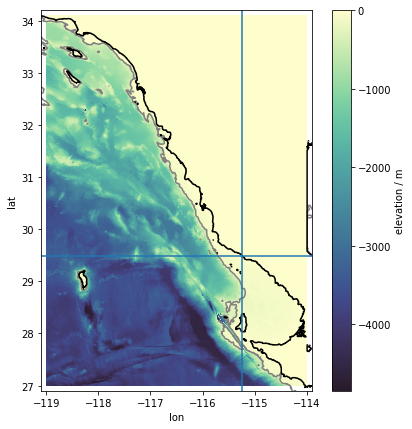

In [5]:
fig, ax = plt.subplots(1,1,figsize=(7,7))
pc = ax.pcolormesh(lon[lon1:lon2],lat[lat1:lat2], elev[lat1:lat2,lon1:lon2], cmap=cmo.cm.deep_r)
cb = plt.colorbar(pc)
cn = ax.contour(lon, lat, -elev, colors='0.5', levels=[250])
cn = ax.contour(lon, lat, -elev, colors='k', levels=[0])
ax.axhline(lat[lat2-1110])
ax.axvline(lon[lon2-300])

cb.set_label('elevation / m')
ax.set_xlabel('lon')
ax.set_ylabel('lat')
ax.set_xlim(-119.1,-113.9)
ax.set_ylim(26.9,34.2)
ax.set_aspect(1)

**Map above**: Colormesh of proposed domain 1 with land set to 0 m and bottom depth flattened at -5000 m (max depth found is 5083 m).  Black contour at 0 m depth, gray contour at -250 m depth (shelf break). There are some weird features I need to erase. For example, the track lines (I think they come from the measurement tracks) in the "trench" between the main continental shelf, and multiple coastline features on the southeast coast of the bay that I won't be able to resolve.    

In [6]:
nx = 320
ny = 456

lon_vect = np.round(np.linspace(-119.0,-114.0,nx+1), decimals=5)
lat_vect = np.round(np.linspace(27.0,34.1,ny+1), decimals=5)

f_interp = sci_interp.interp2d(lon,lat,elev)

In [7]:
bathy = f_interp(lon_vect,lat_vect)

/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: No contour levels were found within the data range.
  """


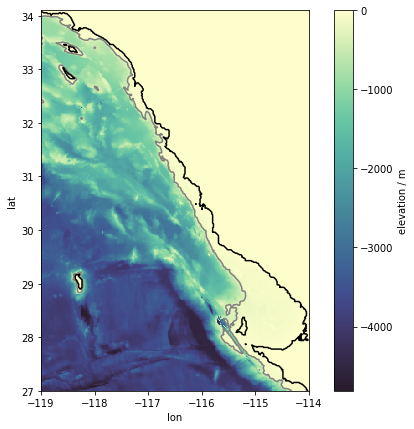

In [8]:
fig, ax = plt.subplots(1,1,figsize=(9,7))
pc = ax.pcolormesh(lon_vect, lat_vect, bathy, cmap=cmo.cm.deep_r)
cb = plt.colorbar(pc)
ax.contour(lon_vect,lat_vect, -bathy, colors='0.5', levels=[250])
ax.contour(lon_vect,lat_vect,  -bathy, colors='k', levels=[0])

cb.set_label('elevation / m')
ax.set_xlabel('lon')
ax.set_ylabel('lat')

ax.set_aspect(1)

In [9]:
def smooth(array):
    filtered = (array[:-1,1:]+array[1:,1:]+array[1:,:-1]+array[1:,1:])/4
    return(filtered)

In [10]:
smooth_bathy = (smooth(bathy))

# Add walls 
smooth_bathy[:,-1] = 0 # east
#smooth_bathy[0,:] = 0 # south
smooth_bathy[-1,:] = 0 # north
#smooth_bathy[:,0] = 0 # west


/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: No contour levels were found within the data range.
  """


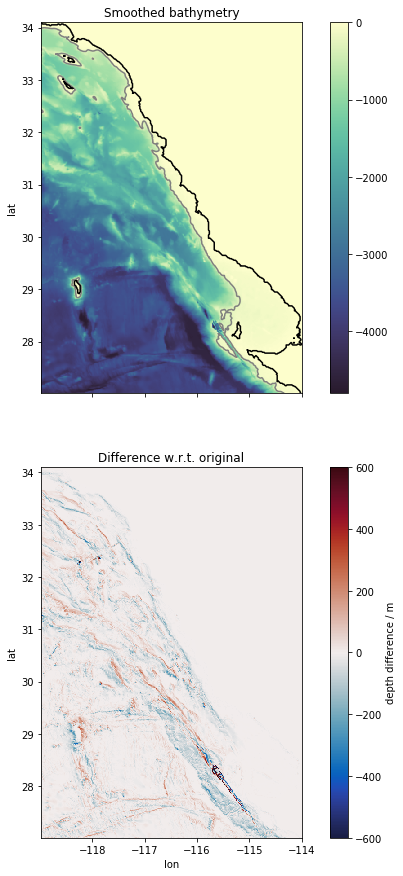

In [11]:
fig, (ax,ax1) = plt.subplots(2,1,figsize=(10,15), sharex=True)
pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], smooth_bathy, cmap=cmo.cm.deep_r)
cb = plt.colorbar(pc, ax=ax)
ax.contour(lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='0.5', levels=[250])
ax.contour( lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='k', levels=[0])

pc1 = ax1.pcolormesh(lon_vect[1:], lat_vect[1:],
                     smooth_bathy-bathy[1:,1:], 
                     cmap=cmo.cm.balance, vmin=-600, vmax=600)
cb = plt.colorbar(pc1, ax=ax1)

cb.set_label('depth difference / m')
ax1.set_xlabel('lon')
ax.set_ylabel('lat')
ax1.set_ylabel('lat')
ax.set_title('Smoothed bathymetry')
ax1.set_title('Difference w.r.t. original')
ax.set_aspect(1)
ax1.set_aspect(1)

### Final clean up

Remove 1-cell islands and puddles on land

In [12]:
smooth_bathy[358,116]=smooth_bathy[358,117]
# uff, there's lots to fix...

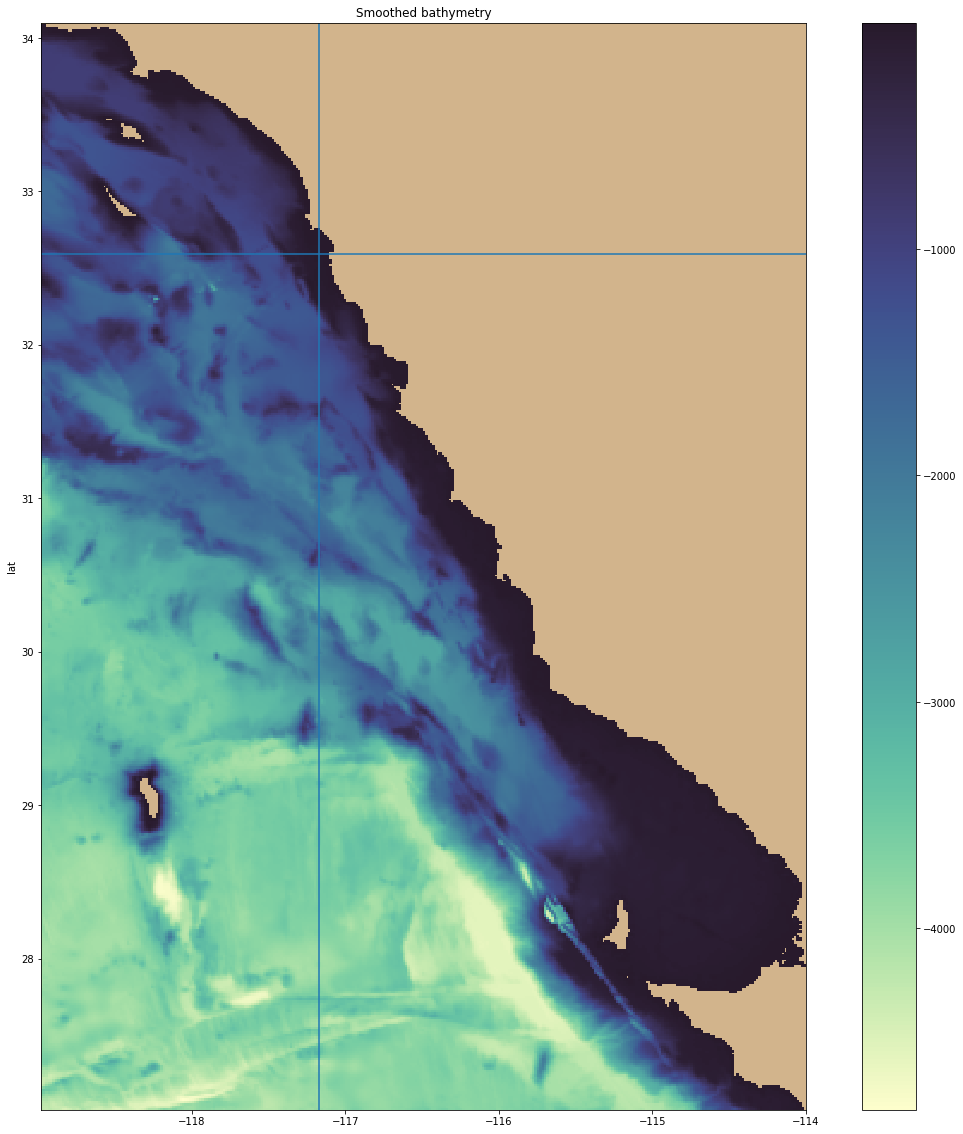

In [13]:
fig, (ax) = plt.subplots(1,1,figsize=(20,20), sharex=True)
mask_smooth = np.ma.masked_values(smooth_bathy,0)
mask = np.ma.getmask(mask_smooth)
ax.set_facecolor('tan')
pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], np.ma.masked_array(smooth_bathy, mask=mask), cmap=cmo.cm.deep)
cb = plt.colorbar(pc, ax=ax)
ax.axvline(lon_vect[117])
ax.axhline(lat_vect[359])

#ax.contour(lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='0.5', levels=[250])
#ax.contour( lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='k', levels=[0])
ax.set_ylabel('lat')
ax.set_title('Smoothed bathymetry')
ax.set_aspect(1)


### Binary file

In [14]:
# Build grid spacing vectors dx and dy 
delx = lon_vect[1:]-lon_vect[:-1]
dely = lat_vect[1:]-lat_vect[:-1]
dx = np.append(delx, [delx[-1]], axis=0) # This is not the best way to do this
dy = np.append(dely, [dely[-1]], axis=0)

In [15]:
dy

array([0.01557, 0.01557, 0.01557, 0.01557, 0.01557, 0.01557, 0.01557,
       0.01557, 0.01557, 0.01557, 0.01557, 0.01557, 0.01557, 0.01557,
       0.01557, 0.01557, 0.01557, 0.01557, 0.01557, 0.01557, 0.01557,
       0.01557, 0.01557, 0.01557, 0.01557, 0.01557, 0.01557, 0.01557,
       0.01558, 0.01557, 0.01557, 0.01557, 0.01557, 0.01557, 0.01557,
       0.01557, 0.01557, 0.01557, 0.01557, 0.01557, 0.01557, 0.01557,
       0.01557, 0.01557, 0.01557, 0.01557, 0.01557, 0.01557, 0.01557,
       0.01557, 0.01557, 0.01557, 0.01557, 0.01557, 0.01557, 0.01557,
       0.01557, 0.01557, 0.01557, 0.01557, 0.01557, 0.01557, 0.01557,
       0.01557, 0.01557, 0.01557, 0.01557, 0.01557, 0.01557, 0.01557,
       0.01557, 0.01557, 0.01557, 0.01557, 0.01557, 0.01557, 0.01557,
       0.01557, 0.01557, 0.01557, 0.01557, 0.01557, 0.01557, 0.01557,
       0.01557, 0.01558, 0.01557, 0.01557, 0.01557, 0.01557, 0.01557,
       0.01557, 0.01557, 0.01557, 0.01557, 0.01557, 0.01557, 0.01557,
       0.01557, 0.01

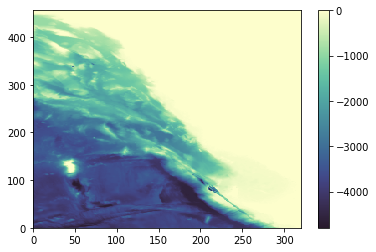

In [17]:
bathy_fname = '320x456/domain3_320x456_5000m_SVB_bat.bin'
dx_fname = '320x456/domain3_320x456_5000m_SVB_dx.bin'
dy_fname = '320x456/domain3_320x456_5000m_SVB_dy.bin'

dt = np.dtype('>f8')  # float 64 big endian

fileobj = open(dx_fname,mode='wb')
dx.astype(dt).tofile(fileobj,"")
fileobj.close()

fileobj = open(dy_fname, mode='wb')
dy.astype(dt).tofile(fileobj,"")
fileobj.close()

fileobj = open(bathy_fname, mode='wb')
dd=smooth_bathy
dd.astype(dt).tofile(fileobj,"")
fileobj.close()

plt.pcolor(dd, cmap=cmo.cm.deep_r)
plt.colorbar()
plt.show()

#### Check that bin file works when read by fortran

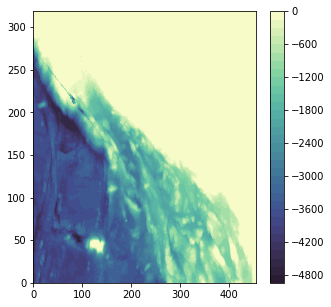

In [18]:
cc=np.fromfile(bathy_fname, dtype=dt)
np.shape(cc)

bF=np.reshape(cc,[nx,ny],'F') # F to read in Fortran order

fig,ax = plt.subplots(1,1, figsize=(5,5))

pc = ax.contourf(bF, 40, cmap=cmo.cm.deep_r)
plt.colorbar(pc,ax=ax)


In [19]:
bF[:,-1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [20]:
ny

456

In [21]:
nx

320